In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.rename(columns={
    "x": "length",
    "y": "width",
    "depth": "depth_pct",
    "z": "depth",
    "cut": "quality"
}, inplace=True)
df.head(6)

,carat,quality,color,clarity,depth_pct,table,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53940 non-null  float64
 1   quality    53940 non-null  object 
 2   color      53940 non-null  object 
 3   clarity    53940 non-null  object 
 4   depth_pct  53940 non-null  float64
 5   table      53940 non-null  float64
 6   price      53940 non-null  int64  
 7   length     53940 non-null  float64
 8   width      53940 non-null  float64
 9   depth      53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
df["quality-color"] = df["quality"].str.cat(df["color"], sep="-")
df.head()

,carat,quality,color,clarity,depth_pct,table,price,length,width,depth,quality-color
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Ideal-E
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Premium-E
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Good-E
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Premium-I
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Good-J


In [6]:
df.describe(include=[np.object_])

,quality,color,clarity,quality-color
count,53940,53940,53940,53940
unique,5,7,8,35
top,Ideal,G,SI1,Ideal-G
freq,21551,11292,13065,4884


In [7]:
df["quality"].sort_values(ascending=True)

3850          Fair
51464         Fair
51466         Fair
10237         Fair
10760         Fair
           ...    
7402     Very Good
43101    Very Good
16893    Very Good
16898    Very Good
21164    Very Good
Name: quality, Length: 53940, dtype: object

In [8]:
df["price"].sort_values(ascending=False)

27749    18823
27748    18818
27747    18806
27746    18804
27745    18803
         ...  
4          335
3          334
2          327
1          326
0          326
Name: price, Length: 53940, dtype: int64

In [9]:
df.sort_values(by=["carat"], ascending=True)

,carat,quality,color,clarity,depth_pct,table,price,length,width,depth,quality-color
31593,0.20,Premium,E,VS2,61.1,59.0,367,3.81,3.78,2.32,Premium-E
31597,0.20,Ideal,D,VS2,61.5,57.0,367,3.81,3.77,2.33,Ideal-D
31596,0.20,Premium,F,VS2,62.6,59.0,367,3.73,3.71,2.33,Premium-F
31595,0.20,Ideal,E,VS2,59.7,55.0,367,3.86,3.84,2.30,Ideal-E
31594,0.20,Premium,E,VS2,59.7,62.0,367,3.84,3.80,2.28,Premium-E
...,...,...,...,...,...,...,...,...,...,...,...
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24,Premium-J
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17,Premium-I
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43,Fair-H
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72,Fair-J


In [10]:
df.sort_values(by=["carat"], ascending=False)

,carat,quality,color,clarity,depth_pct,table,price,length,width,depth,quality-color
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98,Fair-J
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72,Fair-J
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43,Fair-H
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24,Premium-J
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17,Premium-I
...,...,...,...,...,...,...,...,...,...,...,...
31592,0.20,Premium,E,VS2,59.0,60.0,367,3.81,3.78,2.24,Premium-E
31591,0.20,Premium,E,VS2,59.8,62.0,367,3.79,3.77,2.26,Premium-E
31601,0.20,Premium,D,VS2,61.7,60.0,367,3.77,3.72,2.31,Premium-D
14,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27,Premium-E


In [11]:
carat_greater_03 = df[df["carat"] > 0.3]
carat_greater_03

,carat,quality,color,clarity,depth_pct,table,price,length,width,depth,quality-color
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Good-J
13,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71,Ideal-J
15,0.32,Premium,E,I1,60.9,58.0,345,4.38,4.42,2.68,Premium-E
23,0.31,Very Good,J,SI1,59.4,62.0,353,4.39,4.43,2.62,Very Good-J
24,0.31,Very Good,J,SI1,58.1,62.0,353,4.44,4.47,2.59,Very Good-J
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,Ideal-D
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,Good-D
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,Very Good-D
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,Premium-H


In [12]:
dim_greater_5 = df[(df["depth"] > 5) & (df["width"] > 5) & (df["depth"] > 5)]
dim_greater_5

,carat,quality,color,clarity,depth_pct,table,price,length,width,depth,quality-color
11778,1.83,Fair,J,I1,70.0,58.0,5083,7.34,7.28,5.12,Fair-J
13002,2.14,Fair,J,I1,69.4,57.0,5405,7.74,7.70,5.36,Fair-J
13118,2.15,Fair,J,I1,65.5,57.0,5430,8.01,7.95,5.23,Fair-J
13562,1.96,Fair,F,I1,66.6,60.0,5554,7.59,7.56,5.04,Fair-F
13757,2.22,Fair,J,I1,66.7,56.0,5607,8.04,8.02,5.36,Fair-J
...,...,...,...,...,...,...,...,...,...,...,...
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04,Very Good-G
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16,Premium-I
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80,Very Good-E
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12,Ideal-E


In [13]:
prem_or_ideal = df[(df["quality"] == "Premium") | (df["quality"] == "Ideal")]
prem_or_ideal

,carat,quality,color,clarity,depth_pct,table,price,length,width,depth,quality-color
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Ideal-E
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Premium-E
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Premium-I
11,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46,Ideal-J
12,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33,Premium-F
...,...,...,...,...,...,...,...,...,...,...,...
53931,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43,Premium-F
53934,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,Premium-D
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,Ideal-D
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,Premium-H


In [14]:
fair_good_prem = df[(df["quality"] == "Premium") | (df["quality"] == "Fair") | (df["quality"] == "Good")]
fair_good_prem

,carat,quality,color,clarity,depth_pct,table,price,length,width,depth,quality-color
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Premium-E
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Good-E
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Premium-I
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Good-J
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,Fair-E
...,...,...,...,...,...,...,...,...,...,...,...
53930,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49,Premium-E
53931,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43,Premium-F
53934,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,Premium-D
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,Good-D


In [15]:
df.columns

Index(['carat', 'quality', 'color', 'clarity', 'depth_pct', 'table', 'price',
       'length', 'width', 'depth', 'quality-color'],
      dtype='object')

In [16]:
print("Original Dataframe:")
print(df.head())
print("\nSubset of 3 rows from diamonds DataFrame:")
result = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv", nrows=3)
print(result.head())

Original Dataframe:
   carat  quality color clarity  depth_pct  table  price  length  width  \
0   0.23    Ideal     E     SI2       61.5   55.0    326    3.95   3.98   
1   0.21  Premium     E     SI1       59.8   61.0    326    3.89   3.84   
2   0.23     Good     E     VS1       56.9   65.0    327    4.05   4.07   
3   0.29  Premium     I     VS2       62.4   58.0    334    4.20   4.23   
4   0.31     Good     J     SI2       63.3   58.0    335    4.34   4.35   

   depth quality-color  
0   2.43       Ideal-E  
1   2.31     Premium-E  
2   2.31        Good-E  
3   2.63     Premium-I  
4   2.75        Good-J  

Subset of 3 rows from diamonds DataFrame:


   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5     55    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8     61    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9     65    327  4.05  4.07  2.31


In [17]:
result = df.select_dtypes(exclude=["string", "object"])
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53940 non-null  float64
 1   depth_pct  53940 non-null  float64
 2   table      53940 non-null  float64
 3   price      53940 non-null  int64  
 4   length     53940 non-null  float64
 5   width      53940 non-null  float64
 6   depth      53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.9 MB


In [18]:
result = df.select_dtypes(include=["int64", "float64"])
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53940 non-null  float64
 1   depth_pct  53940 non-null  float64
 2   table      53940 non-null  float64
 3   price      53940 non-null  int64  
 4   length     53940 non-null  float64
 5   width      53940 non-null  float64
 6   depth      53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.9 MB


In [19]:
result = df.describe(include=["float64"])
result

,carat,depth_pct,table,length,width,depth
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


In [20]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[numeric_cols].mean()

carat           0.797940
depth_pct      61.749405
table          57.457184
price        3932.799722
length          5.731157
width           5.734526
depth           3.538734
dtype: float64

In [21]:
df.mean(axis=1)

C:\Users\stefa\AppData\Local\Temp\ipykernel_1848\3676274908.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean(axis=1)


0         64.727143
1         65.292857
2         65.651429
3         66.535714
4         66.864286
            ...    
53935    412.932857
53936    412.981429
53937    413.628571
53938    413.267143
53939    412.898571
Length: 53940, dtype: float64

In [22]:
grouped_quality = df.groupby("quality")
grouped_quality["price"].mean()

quality
Fair         4358.757764
Good         3928.864452
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Name: price, dtype: float64

In [23]:
grouped_quality = df.groupby("quality")
grouped_quality["price"].agg(["count", "min", "max"])

,count,min,max
quality,,,
Fair,1610,337,18574
Good,4906,327,18788
Ideal,21551,326,18806
Premium,13791,326,18823
Very Good,12082,336,18818


C:\Users\stefa\AppData\Local\Temp\ipykernel_1848\4049317770.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_quality.mean().plot(kind="bar")


<Axes: xlabel='quality'>

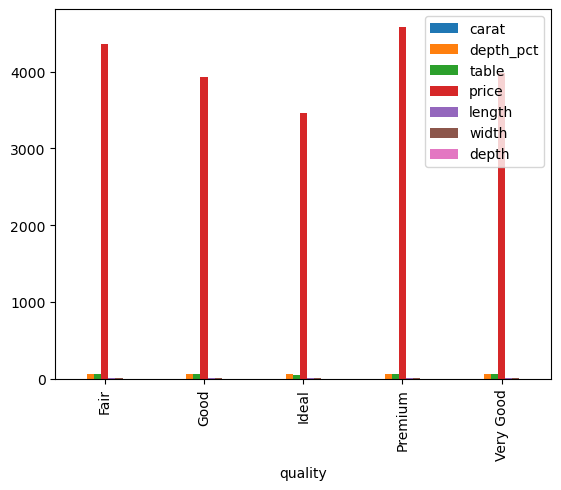

In [24]:
grouped_quality = df.groupby("quality")
grouped_quality.mean().plot(kind="bar")

In [30]:
grouped_quality = df.groupby("quality")
grouped_quality["quality"].count()

quality
Fair          1610
Good          4906
Ideal        21551
Premium      13791
Very Good    12082
Name: quality, dtype: int64

In [31]:
grouped_quality = df.groupby("quality")
grouped_quality["quality"].count() / sum(grouped_quality["quality"].count())

quality
Fair         0.029848
Good         0.090953
Ideal        0.399537
Premium      0.255673
Very Good    0.223990
Name: quality, dtype: float64

In [34]:
df["quality"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [35]:
df["quality"].nunique()

5

In [36]:
pd.crosstab(index=df["quality"], columns=df["color"])

color,D,E,F,G,H,I,J
quality,,,,,,,
Fair,163,224,312,314,303,175,119
Good,662,933,909,871,702,522,307
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678


In [37]:
df["quality"].describe()

count     53940
unique        5
top       Ideal
freq      21551
Name: quality, dtype: object

<Axes: >

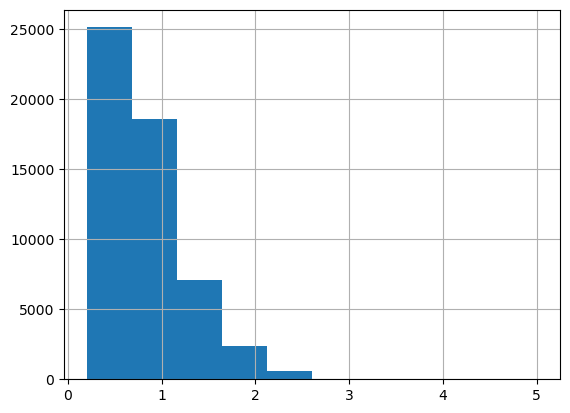

In [38]:
df["carat"].hist()

<Axes: >

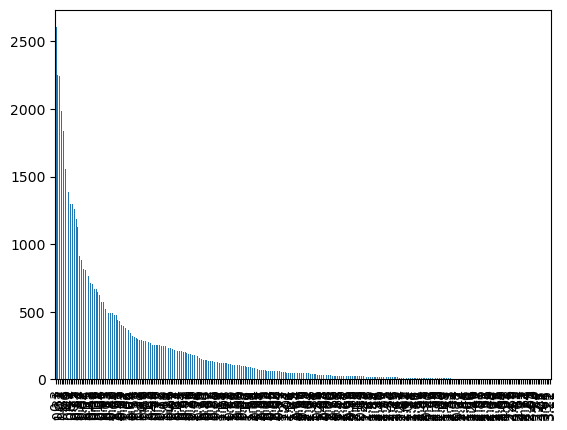

In [40]:
df["carat"].value_counts().plot(kind="bar")

In [41]:
df.isnull()

,carat,quality,color,clarity,depth_pct,table,price,length,width,depth,quality-color
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
53935,False,False,False,False,False,False,False,False,False,False,False
53936,False,False,False,False,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False,False,False,False,False


In [42]:
df.isnull().sum()

carat            0
quality          0
color            0
clarity          0
depth_pct        0
table            0
price            0
length           0
width            0
depth            0
quality-color    0
dtype: int64

In [44]:
result = df.dropna(subset=["length", "width", "depth"], axis=0)
result

,carat,quality,color,clarity,depth_pct,table,price,length,width,depth,quality-color
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Ideal-E
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Premium-E
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Good-E
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Premium-I
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Good-J
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,Ideal-D
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,Good-D
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,Very Good-D
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,Premium-H


In [45]:
result = df.set_index("carat")
result

,quality,color,clarity,depth_pct,table,price,length,width,depth,quality-color
carat,,,,,,,,,,
0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Ideal-E
0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Premium-E
0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Good-E
0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Premium-I
0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Good-J
...,...,...,...,...,...,...,...,...,...,...
0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,Ideal-D
0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,Good-D
0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,Very Good-D
